# Imports

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import gd as gd
import math
from random import randint
from sklearn.ensemble import IsolationForest

# Load data

array([[  2,   0],
       [  3,   7],
       [ -1,  -1],
       [  7,   3],
       [ -2,   2],
       [ -2,  -2],
       [  1,  -9],
       [ -8,  -2],
       [ -5,   1],
       [ -4,  -7],
       [  7,  -1],
       [  0,  -7],
       [ -2,   0],
       [ -5,   1],
       [ -3,  -1],
       [ -3,   9],
       [  0,  -5],
       [  4,  -6],
       [  1,  -9],
       [ -6,   0],
       [  3,   0],
       [  0,  -1],
       [ -7,  -3],
       [ -2,   5],
       [  1,  -8],
       [  1,  -1],
       [ -3,   3],
       [  5,   4],
       [ -4,  -1],
       [  1,   4],
       [ -2,   0],
       [ -5,  -5],
       [  4,   6],
       [  0,   5],
       [  1,  -3],
       [  1,   7],
       [  0,   7],
       [-13,   4],
       [  0,  -1],
       [  0,  -9],
       [ -1,   1],
       [  7,  -2],
       [ -4,  -2],
       [  4,   1],
       [ -2,   2],
       [  0,   4],
       [ -3,  -1],
       [ -1,  -7],
       [  1,   1],
       [  0,  -1],
       [ -7,  -2],
       [ -1,  -4],
       [  0,

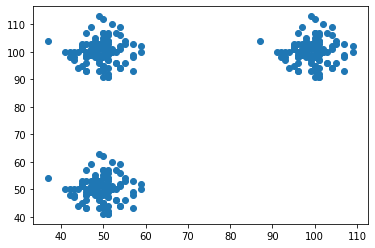

In [59]:
rng = np.random.RandomState(42)

# Generate train data
X = 5 * rng.randn(100, 2)
X = X.astype(int)
X_1 = X + 50
X_2 = X + 100
X_3 = np.c_[X[:,0] + 50, X[:,1] + 100]
X_train = np.r_[(X_1, X_2, X_3)]
plt.scatter(X_train[:, 0], X_train[:, 1])
X

In [ ]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()
X_train.shape